Import library 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

Read data, currently present in current working dir

In [2]:
df = pd.read_csv(r"loan.csv")

C:\Users\nigam\AppData\Local\Temp\ipykernel_30148\781077754.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"loan.csv")


In [3]:
list(df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

print(df.head())

In [4]:
df.shape

(39717, 111)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [6]:
print(df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [7]:
missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values)



Columns with missing values:
 id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [8]:
missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values)
columns_with_nulls = missing_values[missing_values > 0].index.tolist()
print("Columns with null values:", columns_with_nulls)

Columns with missing values:
 id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64
Columns with null values: ['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu

Start removing the columns which has all null values 
To calculate this, lets find total number of rows of dataframe 

In [9]:
total_rows = len(df)

Below code , will find the all columns values which are having all null values 

In [10]:
all_null_columns = df.columns[df.isnull().sum() == total_rows].tolist()

In [11]:
print(f"columns with all null values :: {all_null_columns}")

columns with all null values :: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_b

Drop columns and assign it to new datafram 

In [12]:
df_non_nulldata = df.drop(columns=all_null_columns)

Validate if no null column values are present in new dataframe

In [13]:
df_non_nulldata.columns[df_non_nulldata.isnull().sum() == len(df_non_nulldata)].tolist()

[]

In [14]:
df_non_nulldata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
df_non_nulldata.describe().columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

List down numercial and Categorical 

In [24]:
categorical_cols = df_non_nulldata.select_dtypes(include=['object']).columns



In [22]:
# Find numerical columns (int or float type)
numerical_cols = df_non_nulldata.select_dtypes(include=['int64', 'float64']).columns

In [25]:
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns:   {numerical_cols}")

Categorical columns: Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')
Numerical columns:   Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_wit

Fill numerical columns with median

In [30]:

numerical_cols = df_non_nulldata.select_dtypes(include=['int64', 'float64']).columns


In [31]:
df_non_nulldata[numerical_cols] = df_non_nulldata[numerical_cols].apply(lambda col: col.fillna(col.median()), axis=0)

Fill categorical columns with "Unknown"

In [29]:

categorical_cols = df_non_nulldata.select_dtypes(include=['object']).columns

In [32]:
df_non_nulldata[categorical_cols] = df_non_nulldata[categorical_cols].apply(lambda col: col.fillna("Unknown"), axis=0)

Convert date columns to datetime column

In [33]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df_non_nulldata[date_cols] = df_non_nulldata[date_cols].apply(lambda col: pd.to_datetime(col, errors='coerce') if col.name in df_non_nulldata.columns else col)

C:\Users\nigam\AppData\Local\Temp\ipykernel_30148\1555751958.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_non_nulldata[date_cols] = df_non_nulldata[date_cols].apply(lambda col: pd.to_datetime(col, errors='coerce') if col.name in df_non_nulldata.columns else col)
C:\Users\nigam\AppData\Local\Temp\ipykernel_30148\1555751958.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_non_nulldata[date_cols] = df_non_nulldata[date_cols].apply(lambda col: pd.to_datetime(col, errors='coerce') if col.name in df_non_nulldata.columns else col)
C:\Users\nigam\AppData\Local\Temp\ipykernel_30148\1555751958.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil

Convert Interest rate to numeric 

In [34]:
df_non_nulldata['int_rate'] = df_non_nulldata['int_rate'].str.replace('%', '').astype(float)

Loan amount vs loan status

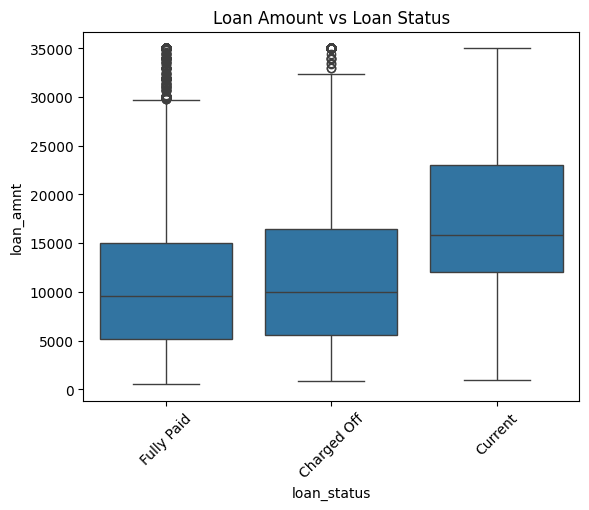

In [36]:
sns.boxplot(data=df_non_nulldata, x='loan_status', y='loan_amnt')
plt.title("Loan Amount vs Loan Status")
plt.xticks(rotation=45)
plt.show()

Clean the outliner data for better understanding

In [38]:
Q1 = df_non_nulldata['loan_amnt'].quantile(0.25)  
Q3 = df_non_nulldata['loan_amnt'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [39]:
filtered_data = df_non_nulldata[(df_non_nulldata['loan_amnt'] >= lower_bound) & 
                                (df_non_nulldata['loan_amnt'] <= upper_bound)]

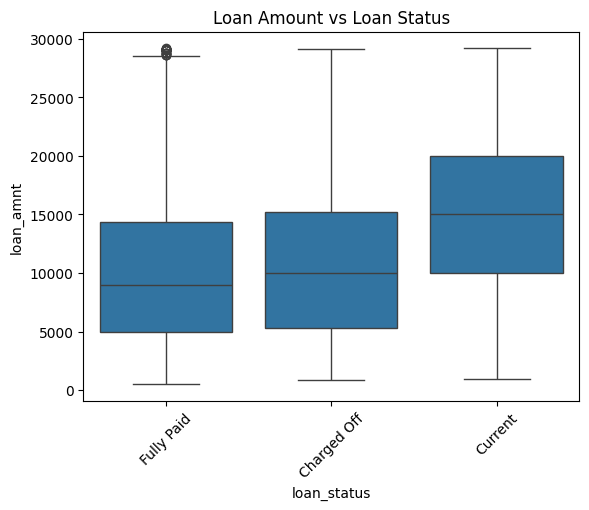

In [41]:

sns.boxplot(data=filtered_data, x='loan_status', y='loan_amnt')
plt.title("Loan Amount vs Loan Status")
plt.xticks(rotation=45)
plt.show()


Lets analyse defaulter with loan purpose and as defination Charged Off status indicates that the loan has defaulted 

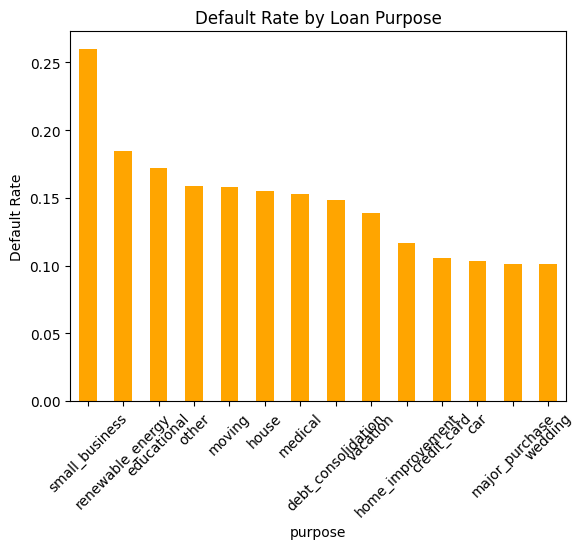

: 

In [42]:
    default_rates = df.groupby('purpose')['loan_status'].apply(lambda x: (x == 'Charged Off').mean())
    default_rates.sort_values(ascending=False).plot(kind='bar', color='orange')
    plt.title("Default Rate by Loan Purpose")
    plt.ylabel("Default Rate")
    plt.xticks(rotation=45)
    plt.show()